In [26]:
import csv
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:

# with open('./OnlineRetail.csv', newline='') as f:
f=open('./RetailLimited.csv')
reader = csv.reader(f)
fullData=list(reader)
data=np.array(fullData[1:])
print(data)

[['536365' '85123A' 'WHITE HANGING HEART T-LIGHT HOLDER' ... '2.55'
  '17850' 'United Kingdom']
 ['536365' '71053' 'WHITE METAL LANTERN' ... '3.39' '17850'
  'United Kingdom']
 ['536365' '84406B' 'CREAM CUPID HEARTS COAT HANGER' ... '2.75' '17850'
  'United Kingdom']
 ...
 ['565617' '21745' 'GAOLERS KEYS DECORATIVE GARDEN ' ... '8.29' ''
  'United Kingdom']
 ['565617' '21880' 'RED RETROSPOT TAPE' ... '0.42' '' 'United Kingdom']
 ['565617' '21902' 'KEY FOB , FRONT  DOOR ' ... '1.63' ''
  'United Kingdom']]


#### 1. Find mean, std dev, min , max of unitprice field.

In [28]:
unitPrice=list(map(float, data[:, 5]))#data[:, 5] means ke 5th column ka sara data i.e. ':'
print(f'Min: {np.min(unitPrice)}, Max:{np.max(unitPrice)}, Std. Deviation:{np.std(unitPrice)}, Mean:{np.mean(unitPrice)}')

Min: 0.0, Max:13541.33, Std. Deviation:92.0854316205922, Mean:4.709928864101981


#### 2. Draw histogram of unitprice field using matplotlib

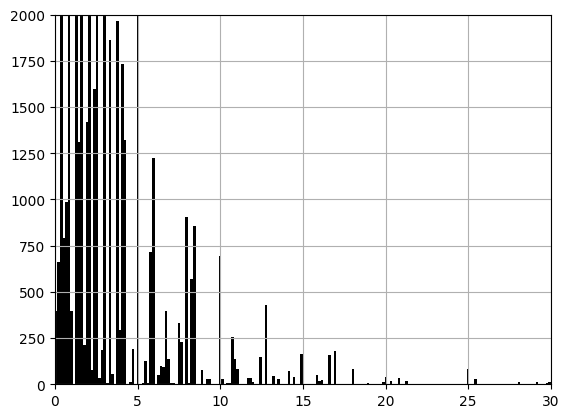

In [29]:
import matplotlib.pyplot as plt
plt.hist(unitPrice,bins='fd', facecolor='black')
# plt.hist(unitPrice, np.arange(0, 30))
plt.axis([0, 30, 0, 2000])
plt.grid(True)
plt.show()

#### 3. Find mean of unitprice group by country and plot them

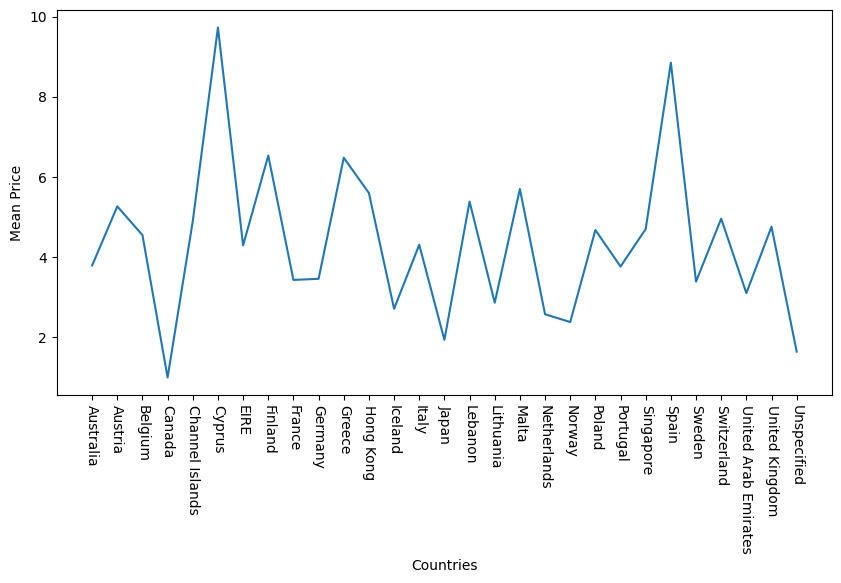

In [34]:
import matplotlib.pyplot as plt
countries=np.unique(data[:, 7])
means=[]
for country in countries:
    totalPrice=np.sum(list(map(float, (data[data[:, 7]==country][:, 5]))))
    totalNumber=len(data[data[:, 7]==country])
    means.append(totalPrice/totalNumber)
plt.figure(figsize=(10,5))
plt.plot(countries, means)
plt.xticks(rotation=-90)
plt.xlabel('Countries')
plt.ylabel('Mean Price')
plt.show()




#### Find min and max of unit price group by customerID

In [31]:
# uniqueIds=np.unique(data[data[:,6]!=''])
uniqueIds = np.unique(data[data[:, 6] != ''][:, 6]) 
result = []
for id in uniqueIds:
    temp = data[data[:, 6] == id][:,5]
    temp=list(map(float, temp))
    result.append((min(temp), max(temp)))
for i, j in zip(uniqueIds, result):
    print(i, j)


12347 (0.42, 12.75)
12348 (0.29, 40.0)
12350 (0.85, 40.0)
12359 (0.29, 145.0)
12373 (0.85, 40.0)
12375 (0.85, 40.0)
12377 (0.21, 40.0)
12381 (1.25, 4.95)
12388 (1.25, 5.45)
12395 (0.42, 18.0)
12408 (0.42, 15.0)
12410 (0.42, 40.0)
12414 (0.21, 40.0)
12415 (0.36, 3.39)
12417 (0.42, 15.0)
12421 (0.42, 28.0)
12422 (1.25, 2.08)
12423 (0.29, 15.0)
12427 (1.65, 18.0)
12428 (4.95, 4.95)
12431 (0.85, 8.5)
12433 (0.29, 7.95)
12436 (0.55, 40.0)
12437 (0.21, 18.0)
12456 (1.45, 3.75)
12464 (2.55, 15.0)
12468 (0.42, 18.0)
12471 (0.42, 18.0)
12472 (0.12, 18.0)
12474 (0.19, 18.0)
12476 (0.85, 18.0)
12477 (0.65, 16.95)
12483 (0.85, 18.0)
12484 (0.29, 28.0)
12490 (0.42, 18.0)
12492 (0.42, 18.0)
12500 (1.25, 18.0)
12501 (0.42, 5.95)
12502 (0.42, 28.0)
12523 (0.42, 18.0)
12528 (0.42, 18.0)
12530 (2.08, 5.95)
12539 (0.55, 1715.85)
12540 (0.29, 28.0)
12553 (1.65, 1.65)
12557 (1.45, 1.65)
12559 (0.29, 18.0)
12560 (0.42, 4.25)
12567 (0.12, 42.95)
12569 (0.83, 18.0)
12574 (1.25, 18.0)
12576 (0.55, 24.95)
12578

#### Find cumulative sales monthly and yearly and plot them.

['January', 'February', 'August', 'September', 'December']


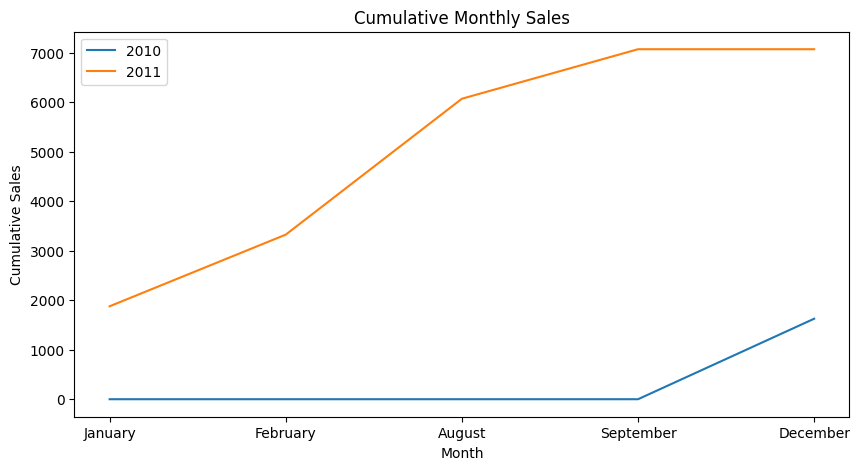

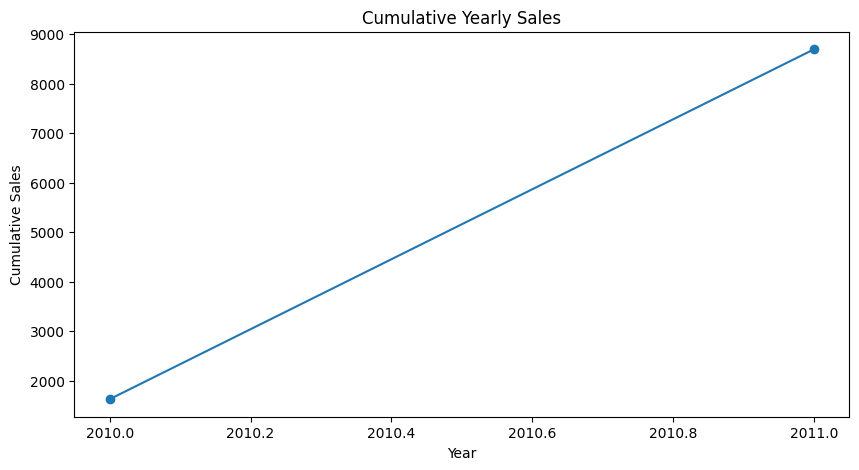

In [32]:
monthNames=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
invoiceData = np.unique(data[data[:, 4] != ''][:, 4])
sales = data[data[:, 4] != ''][:, 5].astype(float)  
dates = []
for date in invoiceData:
    splitDate = date.split()[0].split('/')
    splitDate[0], splitDate[1]=splitDate[1], splitDate[0]
    splitDate[0], splitDate[-1]= splitDate[-1], splitDate[0]
    if len(splitDate[1]) == 1:
        splitDate[1] = '0' + splitDate[1]
    if len(splitDate[-1])==1:
        splitDate[-1]='0'+splitDate[-1]
    dates.append(np.datetime64('-'.join(splitDate), 'D'))
dates = np.array(dates)

years = np.array([d.astype('datetime64[Y]').astype(int) + 1970 for d in dates])
months = np.array([d.astype('datetime64[M]').astype(int) % 12 for d in dates])
uniqueYears = np.unique(years)
uniqueMonths = np.unique(months)
months=[monthNames[i] for i in uniqueMonths]
print(months)

monthly_sales = {year: {month: 0 for month in uniqueMonths} for year in uniqueYears}
yearly_sales = {year: 0 for year in uniqueYears}

for date, sale in zip(dates, sales):
    year = date.astype('datetime64[Y]').astype(int) + 1970
    month = date.astype('datetime64[M]').astype(int) % 12 
    monthly_sales[year][month] += sale
    yearly_sales[year] += sale

for year in uniqueYears:
    monthly_sales[year] = np.cumsum(list(monthly_sales[year].values()))

yearly_sales = np.cumsum(list(yearly_sales.values()))

plt.figure(figsize=(10, 5))
for year in uniqueYears:
    plt.plot(months, monthly_sales[year], label=f"{year}")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.title("Cumulative Monthly Sales")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(uniqueYears, yearly_sales, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Cumulative Sales")
plt.title("Cumulative Yearly Sales")
plt.show()
